In [140]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
import os
from rlway.pyosrd.osrd import OSRD

In [142]:
sim = OSRD(use_case='c2y13s', dir='tmp')

[20:07:07,746] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[20:07:07,783] [INFO]              [FullInfra] parsing infra
[20:07:07,848] [INFO]              [FullInfra] adaptation to kotlin
[20:07:07,887] [INFO]              [FullInfra] loading signals
[20:07:07,893] [INFO]              [FullInfra] building blocks
[20:07:07,898] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[20:07:07,912] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.18
[20:07:07,972] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.19
[20:07:07,982] [INFO]  [StandaloneSimulationCommand] All simulations completed
[20:07:07,983] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json


In [143]:
sim.reset_delays()

In [144]:
sim.add_delay('train0', time_threshold=50, delay=300.)
delayed = sim.delayed()

In [145]:
from rlway.pyosrd.agents.agent import DoNothing, Agent

In [146]:
from dataclasses import dataclass
from typing import List, Dict, Any

@dataclass
class AddStop(Agent):
    train: int
    position: float
    duration: float

    def stops(self, osrd) -> List[Dict[str, Any]]:
        return [{
            'train': self.train,
            'position': self.position,
            'duration': self.duration,
        }]

In [147]:
# regulated = Nothing('nada').regulated(sim)
# regulated = AddStop('train0_delayed_at_departure', 0, 100, 200).regulated(sim)
# regulated = sim.regulate(agent=AddStop('name', 1, 100, 200))
regulated = sim.regulate(agent=DoNothing('nothing'))

[20:07:08,377] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[20:07:08,410] [INFO]              [FullInfra] parsing infra
[20:07:08,479] [INFO]              [FullInfra] adaptation to kotlin
[20:07:08,519] [INFO]              [FullInfra] loading signals
[20:07:08,526] [INFO]              [FullInfra] building blocks
[20:07:08,532] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/delayed/nothing/simulation.json
[20:07:08,545] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.18
[20:07:08,603] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.19
[20:07:08,614] [INFO]  [StandaloneSimulationCommand] All simulations completed
[20:07:08,615] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/delayed/nothing/results.json


In [148]:
import matplotlib.pyplot as plt
points_to_show = ['switch', 'departure', 'switch', 'arrival', 'station']
fig1 = sim.space_time_chart_plotly(0, points_to_show=points_to_show)
fig2 = delayed.space_time_chart_plotly(0, points_to_show=points_to_show)
fig3 = regulated.space_time_chart_plotly(0, points_to_show=points_to_show)

In [149]:
fig1.show()
fig2.show()
fig3.show()

In [150]:
from rlway.schedules import schedule_from_osrd

s = schedule_from_osrd(sim)
sd = schedule_from_osrd(delayed)
sr = schedule_from_osrd(regulated)

<Axes: xlabel='Time'>

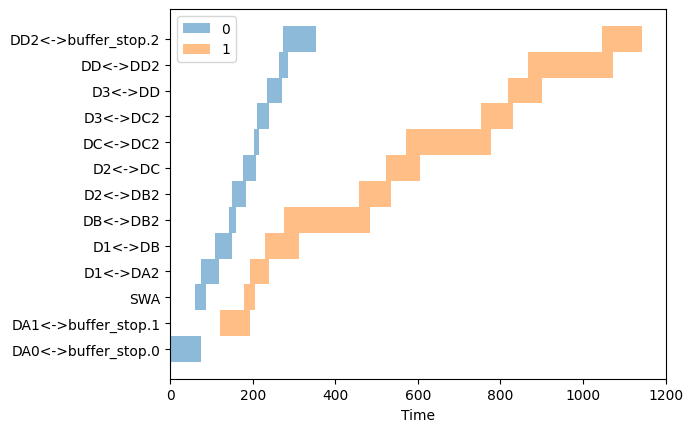

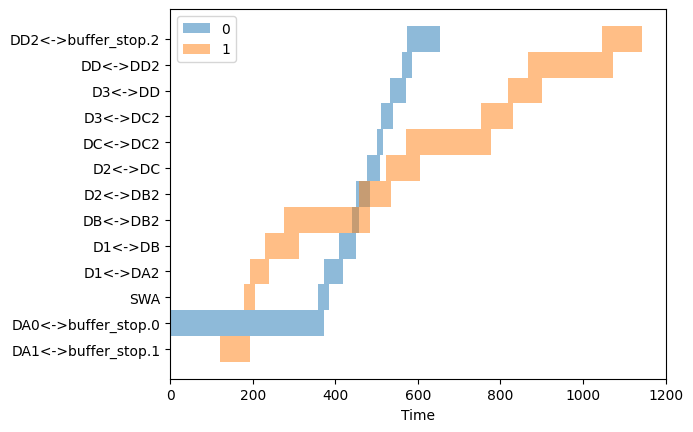

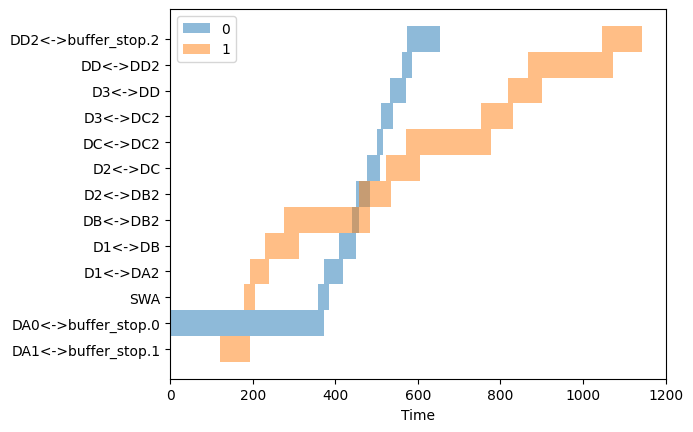

In [151]:
s.sort().plot()
sd.sort().plot()
sr.sort().plot()